# Practical 5  -  Pandas and geospatial data (Visualising PM2.5 data)

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this notebook we are going to use Pandas to load a spreadsheet of time series of hindcast PM2.5 data and perform some statistical analysis on it. The data for this exercise has been taken from the following paper:
    
*Tao Xue, Yixuan Zheng, Dan Tong, Bo Zheng, Xin Li, Tong Zhu, Qiang Zhang, Spatiotemporal continuous estimates of PM2.5   concentrations in China, 2000–2016: A machine learning method with inputs from satellites, chemical transport model, and ground observations, Environment International, Volume 123,2019,Pages 345-357,ISSN 0160-4120, https://doi.org/10.1016/j.envint.2018.11.075.*


Pandas allows us to visualise datasets and produce rapid statistical analysis. It allows us to select data points according to a number of criteria. In this notebook we will carry out the following:
    
 - 1) [Using Pandas to create a dataframe](#Part1)
      * [Exercise 1: Count how many values there are between specific coordinates](#Exercise1)
      * [Exercise 2: Plot a histogram of PM2.5 values across 2010](#Exercise2)
 - 2) [Geospatial plots](#Part2)
      * [Exercise 3: Plot a subset of concentrations over the Hunan province](#Exercise3)
      * [Exercise 4: Plot a percentage change in concentrations between 2005-2016 over China](#Exercise4)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

## 1) Using Pandas to create a dataframe <a name="Part1">

It is worthwhile spending some time introducing the Pandas package. Python is naturally able to deal with data input and output, or 'IO'. So why dont we use default functions in Python? Well, the key is really in the opening definition of Pandas on the [homepage](https://pandas.pydata.org):

>> _"pandas...provides high-performance, easy-to-use data structures and data analysis tools.."_

As we will see shortly, the ability to easily load in data files *and* interpet them in a human readible way is a very powerful tool for any proceeding analysis. The 'high performance' element is key when you start working with very large datafiles.

### The Pandas Dataframe

When we load data using Pandas, we create what is referred to as a dataframe. A useful short summary of the dataframe can be [defined as](https://www.geeksforgeeks.org/python-pandas-dataframe/):

>> _" [A] Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns."__

![](images/Practical_5_figure1.png "Title") 
<h3><center>Figure 1 - Visualising a data frame. source: https://www.geeksforgeeks.org/python-pandas-dataframe/ </center></h3>

So, this looks like a common table, right? It is much more powerful that that. A dataframe has features we can use to our advantage. These include: the ability to quickly select rows according to some criteria such as when a value is true; Removing all rows/columns when a value of criteria is true/false; Mapping a text date entry to a numerical value for plotting; deriving statistics from a column such as mean, max etc. We will practice some of these functions in this and the next practical. 

We can also easily extract data from our data frame for plotting. Let's start by loading some data through Pandas. Please see the code snippet below. How do we load any package in Python? We use the import statement. As with the Numpy package, it is common to see pandas loaded as <code> import pandas as pd </code>:

In [1]:
#Lets load in some data using the Pandas package. First we need to import that package.
import pandas as pd #Im using pd here as its easier to keep writing! You can use whatever you want, but it might help you to use 'pd' for now.
# Notice how we call that function using the '.' operator?
# (Note the data file needs to be in the same directory that your jupyter notebook is based) You can control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("data/PM25_China_annual.csv") 
data.head()

#Pandas has loaded the data into a dataframe. By using the extension .head() we can take a look at the data products 
#available. At the moment this looks like a matrix where the rows are simply data entries, rather than ordered by
#a particular variable, such as time of eruption or eruption number. At least we can scan the range of column headings
#and think about what we want to do next. By the way this is also a good way of ensuring you have loaded in the data
#you expect. Sound silly? If you work with lots of datafiles it can be easy to assume you are working on the correct
#one

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,lon,lat
0,0,21.486885,21.528493,22.942740,23.147671,18.660109,25.913425,30.590137,24.714247,64.335519,20.878630,20.939178,28.188219,28.923224,23.275068,24.743562,26.949315,21.301639,123.25,53.65
1,1,21.758197,23.073425,23.100548,24.809315,18.715574,26.811507,30.920548,24.837260,65.871858,21.043836,21.065479,29.164384,29.191530,23.728219,24.380548,27.369041,22.595082,122.15,53.55
2,2,21.448087,22.535616,22.494521,23.950685,18.399454,26.383288,30.223836,24.045753,65.439071,20.757534,21.149315,29.249041,29.413934,24.155616,24.477808,26.398082,22.722131,122.25,53.55
3,3,20.575410,21.849315,22.359178,23.065479,17.640710,25.584658,29.583288,22.849041,63.694809,20.094247,19.544658,27.744384,28.101913,22.951781,23.333973,24.861370,21.505191,122.35,53.55
4,4,20.549454,21.109041,22.098904,22.066575,17.511475,24.678904,28.898356,23.090411,63.372131,19.680000,19.213973,27.260548,28.201093,22.202466,23.449315,25.647123,21.005464,122.55,53.55


Now let us have a look at the spatial coverage of the entire sheet. Actually before we do that, let us see how many rows we have. This isnt always the best way to calculate the number of unique entries as duplicate datapoints can be common, but now that we have created a dataframe we can see how many entries it has. We can do this via the following properties of our frame: 

```python
data.size
data.shape
data.ndim
```

In [2]:
#dataframe.size - as in rows x columns
size = data.size 
print("Size of dataframe =", size)
  
# dataframe.shape - gives the seperated number of rows, columns, etc
shape = data.shape 
print("Shape of dataframe =", shape)
  
# dataframe.ndim  - Number of dimensions. Do we have a 2D array, 3D array?? etc
ndim = data.ndim 
print("Number of dimensions =", ndim)

Size of dataframe = 1987020
Shape of dataframe = (99351, 20)
Number of dimensions = 2


We can also check the number of entries in any given column. They way we access a column entry in Pandas is by its name. This is very useful, and more helpful than having to remember which column number holds a given entry. The way we can access a specific column is through the square parentheses:

```python
data[column name]
```

where our column name, in this case, is '2001'. Often in Python we chain operations together. In the example above we access the number of dimensions through the operator **'.ndim'**. Let us see how many entries we have in the column '2001':

In [3]:
# series.ndim  - Again im using my own variable name here as 'series'. It dosnt matter. What matters is the correct name of the column
series_ndim = data["2001"].ndim 
print("Number of dimensions =", series_ndim)

series_size = data["2001"].size 
print("Shape of dataframe =", series_size)

series_shape = data["2001"].shape 
print("Size of dataframe =", series_shape)

Number of dimensions = 1
Shape of dataframe = 99351
Size of dataframe = (99351,)


### Selecting a subset of data according to some criteria 

Quite often we need to extract or select a subset of our data according to some criteria, whether that is using numerical bounds or focusing on specific time periods. In the notebook that follows this we will play around with selecting specific dates and periods. In this notebook we will extract data from a subset of coordinates. Before we do that, lets try and contextualise the data a little more and calculate the maximum and minimum of the column labeled **'2005'**. We can  extract the values from this column and then use internal functions in the Numpy library. Namely:

```python
np.min 
np.max
```
We havent imported the Numpy module yet so we need to do that first. Read through the code below. After importing Numpy we then access the values in the dataframe column '2005' using:

```python
data['2005'].values
```
which provides us with a Numpy array. Once we have this array we can pass this to the Numpy function <code> .min </code> as:

```python
Concentrations = data['2005'].values 
Lowest_concentration = np.min(Concentrations)
```
Can you see how we also calculate the highest concentration?

In [4]:
import numpy as np #Import the Numpy library as per usual
Concentrations = data['2005'].values  #Select the column '2005' and extract the values from this column to a new Numpy array
Lowest_concentration = np.min(Concentrations) #Use the internal Numpy function .min to calculate the minimum
print("Lowest concentration of 2005 was ", Lowest_concentration) # Print this value to the screem
Highest_concentration = np.max(Concentrations) # Now find the maximum
print("Highest concentration of 2005 was ", Highest_concentration) # Print this value to screen

Lowest concentration of 2005 was  3.01643835616438
Highest concentration of 2005 was  138.129589041096


What if we wanted to find the coordinates of the highest value? We can also use a conditional statement for this. You may or may not have come across conditional statements before. Every programming language uses them, and they allow us to construct logical workflows. Briefly, the following table lists the Python equivalent of common mathematical symbols to check numerical values.

| Meaning | Math Symbol | Python Symbols |
| --- | --- | --- |
| Less than	 | < | < | 
| Greater than	 | > | > | 
| Less than or equal | ≤ | <= | 
| Greater than or equal | ≥ | >= | 
| Equals | = | == | 
| Not equal | ≠ | != | 

If we want to extract a subset of values from a dataframe we can use, for example, the following examples of syntax:

```python
data[data['Column A'] == X ]
data[data['Column B'] != Y ]
new_dataframe = data[data['Column C'] < Z ]
```
They are all performing different operations, but have common features. In each case we dive into a subset of our dataframe using the square brackets. In the third example, we are creating a new dataframe, called <code> new_dataframe </code>, by taking a copy of our original only when values in <code> Column C </code> are less than variable <code> Z </code>.

So back to our original requirement. In the following code we find the coordinates of the highest value from 2005 and print them to the screen.

In [5]:
Lowest_concentration = np.min(Concentrations) #Use the internal Numpy function .min to calculate the minimum
Highest_concentration = np.max(Concentrations) # Now find the maximum

Latitude = data[data['2005'] == Highest_concentration ]['lat'].values[0]
Longitude = data[data['2005'] == Highest_concentration ]['lon'].values[0]
print('Latitude of highest concentration = ',Latitude)
print('Longitude of highest concentration = ',Longitude)

Latitude of highest concentration =  29.65
Longitude of highest concentration =  95.05


Does this make sense? When we want to select a column from a dataframe we use the following syntax:

```python
data['column we want']
```

The operator <code> .values </code> gives us a numpy array of those values and then we select the first, and only, value using the selection <code> [0] </code>

We have just selected data from our dataframe using one criterion. What if we wanted to introduce a number of conditions? Generally, we can select data that matches two criteria as, for example:

```python
data[(data['Column A'] > X ) & (data['Column A'] < Y)]
```
if we wanted to only take data where <code> Column A </code> values were greater than <code> X </code> but less than <code> Y </code>. In the following exercise, see if you can count the number of entries between specific coordinates by evaluating the size of the extracted array.


<div class="alert alert-block alert-success">
<b> Exercise 1. Count how many values there are between specific coordinates <a name="Exercise1"> </b> 
   
We have been asked to find out how many data points there are between, but not including, the following longitude and latitude coordinates for any given year:
    
| Longitude | Latitude |
| --- | --- | 
| 112	 | 28 | 
| 112	 | 32 |
| 120 | 28 |
| 120 | 32 |

Using the syntax for multiple conditions, did you find there are 3200?

<div>
    

In [6]:
# <<-------------------- INSERT CODE HERE ----------------------->>
number_entries =  data[(data['lon'] > 112 ) & (data['lon'] < 120) & (data['lat'] > 28 ) & (data['lat'] < 32)]['lon'].size 
print("Number of entries between given coordinates = ", number_entries)
# <<------------------------------------------------------------->>

Number of entries between given coordinates =  3200


<div class="alert alert-block alert-success">
<b> Exercise 2. Find the maximum concentration of PM2.5 in the year 2016 using the same region defined in Exercise1 <a name="Exercise1"> </b> 
   
Using the syntax for multiple conditions, did you find a value of roughly 70.315?

<div>

In [7]:
# <<-------------------- INSERT CODE HERE ----------------------->>
maximum_value =  np.max(data[(data['lon'] > 112 ) & (data['lon'] < 120) & (data['lat'] > 28 ) & (data['lat'] < 32)]['2016'].values) 
print("Maximum value, between previous coordinates, for 2005 = ",maximum_value)
# <<------------------------------------------------------------->>

Maximum value, between previous coordinates, for 2005 =  70.3153005464481


### Histograms

Before we move on to producing some geospatial plots of our data, we can also quickly produce a histogram. In the notebook following this we will produce box-plots, but in the code below we can produce a histogram of values in the year 2004 using the <code> .hist </code> function of our dataframe. This is useful as it allows us to determine the spread of values. Change the year to 2016, is there a marked difference?

array([[<AxesSubplot:title={'center':'2004'}>]], dtype=object)

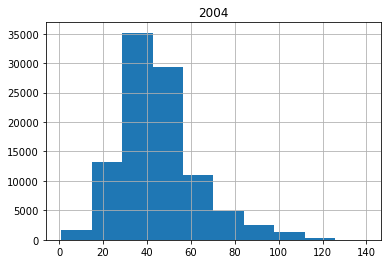

In [8]:
data.hist(column='2004')

### Geospatial plots <a name="Part2">

For our map based plots, we are going to use the module [Cartopy](https://scitools.org.uk/cartopy/docs/v0.13/index.html). First of all let us produce a map of the world. Do not worry about the syntax used for plotting, we will provide templates for all such work. For now, try to get a feel for operations used by comparing the code syntax with the comments provided. Please note that internal functions provided by any given package will have its own set of expected inputs and outputs. In the following code snippet we import Cartopy and then plot a standard global image.

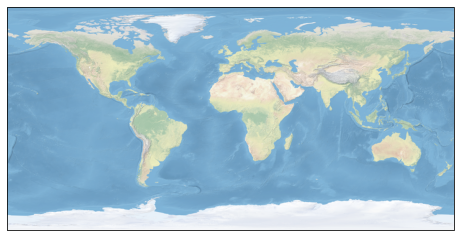

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.show()

Let us make the figure a little bigger. Twice the size? Let's scale our 'figsize' paramters accordingly

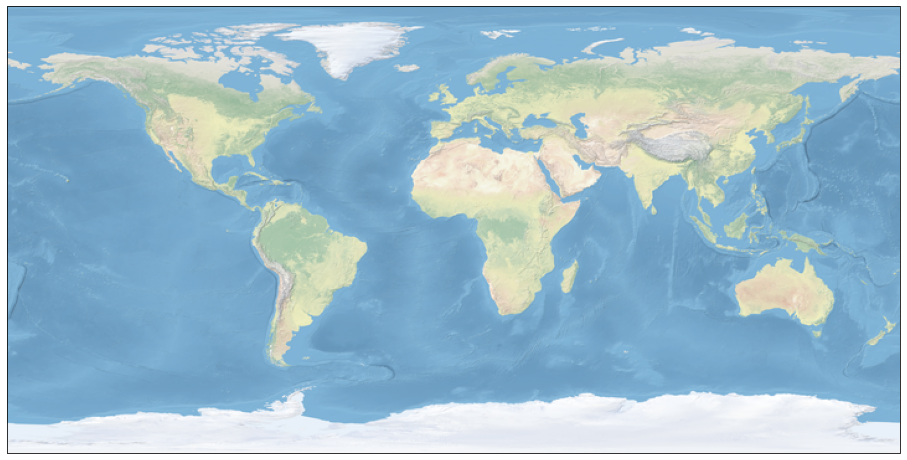

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.show()

The great feature about this map is that it isnt just an image. It also acts as a fully-functioning Matplotlib axes that accepts spherical coordinates and allows us to easily plot data on it. Let us do that by adding the location of every coordinate pair from our dataframe. To do this we are going to extract the lattitude and longitude values from the relevant columns. Recall from the exercise above that we can access columns from our dataframe by the column name through the square parentheses. When we extract the values of that column, by using the <code> .values() </code> operator, we are given a numpy array. Thus, we can chain two operations together to create a new Numpy array of Latitude values:

In [11]:
Latitude = data['lat'].values # Extract the 'Latitude' column and then its .values
Latitude #This will just print a preview of our array to the screen. 

array([53.65, 53.55, 53.55, ..., 18.15, 18.15, 18.15])

We can do the same with longitude values

In [12]:
Longitude = data['lon'].values # We can do the same with Longitude values
Longitude

array([123.25, 122.15, 122.25, ..., 109.55, 109.65, 109.75])

So now let us put this data onto our map as a scatter plot of red datapoints. The syntax below might be a little confusing. Notice how, after we again create a 'bluemarble' image, we also pass the Longitude and Latitude arrays to our map. The reason we are doing this is because we need to convert our coordinates to a spherical system in order to plot this on the map as it currently is presented. Do not worry about the syntax here, this is just to illustrate how we take out Numpy arrays and map the coordinates. Where do we expect all of the data points to sit?

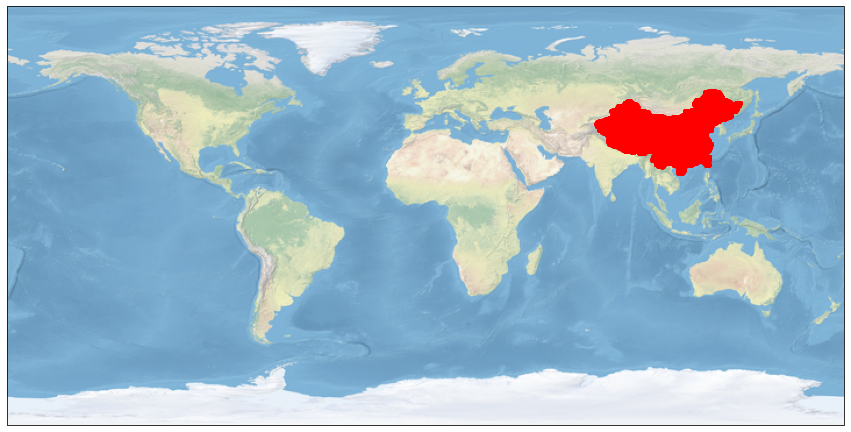

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(Longitude, Latitude,
         color='red', linewidth=2, s=9, marker='o',
         transform=ccrs.PlateCarree(),
         )

plt.show()

Looks cool dosnt it?! Notice how we specied the symbol and colour used for our points? Matplotib has a number of options we can use. You can find them all on the package [website](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). The following table includes a subset:

| character | description |
| --- | --- |
| '.'| point marker |
| ','| pixel marker |
| 'o'| circle marker |
| 'v'| triangle_down marker |
| '^'| triangle_up marker |
| '<'| triangle_left marker |
| '>'| triangle_right marker |

But we need to zoom in to our data. We can change the bounds of our image accordingly, again using appropriate syntax for both Python and the Cartopy package.

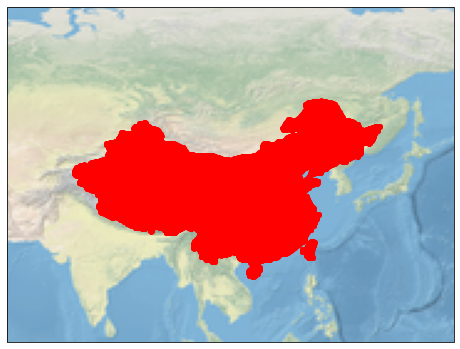

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
lat1, lon1, lat2, lon2 = 60, 150, 5, 66, 
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.Geodetic())

plt.scatter(Longitude, Latitude,
         color='red', linewidth=2, s=9, marker='o',
         transform=ccrs.PlateCarree(),
         )

fig.set_size_inches(8, 8)

plt.show()


We need more information on this map. In the following code snippet I ask Cartopy to set the colour of each point depending on the range of values we have. We are going to set a colourscale. Depending on the range of values you have, you may find you need to use log-values or remove outliers but, for now, we are going to work with the raw data. The code will look a little different in that instead of using <code> color='red' </code> Im using <code> c=data['2005'].values, cmap='winter' </code>. In the second version Im passing an array of numerical values to the function option <code> c </code>, using an existing <code> colormap 'winter' </code>, of which there are many. Im also specifying that the size of each point is much smaller than the previous example so we can see finer detail in the image. Change the year to 2010 and see what happens. Maybe it is too difficult to quantify the change. We will see in the next notebook that we can look at trends.

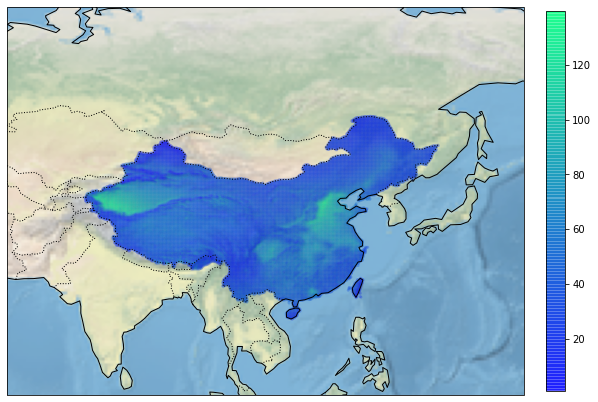

In [16]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
lat1, lon1, lat2, lon2 = 60, 150, 5, 66, 
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.Geodetic())

cp=plt.scatter(Longitude, Latitude,
         c=data['2004'].values, cmap='winter', linewidth=2, s=0.01, marker='o',alpha=0.65,
         transform=ccrs.PlateCarree(),
         )

plt.colorbar(cp,fraction=0.034, pad=0.04)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
fig.set_size_inches(10, 10)

plt.show()


<div class="alert alert-block alert-success">
<b> Exercise 3. Plot a subset of concentrations over the Hunan province in 2016 <a name="Exercise3"> </b> 
   
If we assume that the following coordinates represent a boundary around an area of interest:
    
| Longitude | Latitude |
| --- | --- | 
| 112	 | 28 | 
| 112	 | 32 |
| 120 | 28 |
| 120 | 32 |

Can you repeat the above plot but for this subset of data? A key thing to remember when plotting any data is the number of coordinates/axis points should be identical to the number of data points.

<div>
    

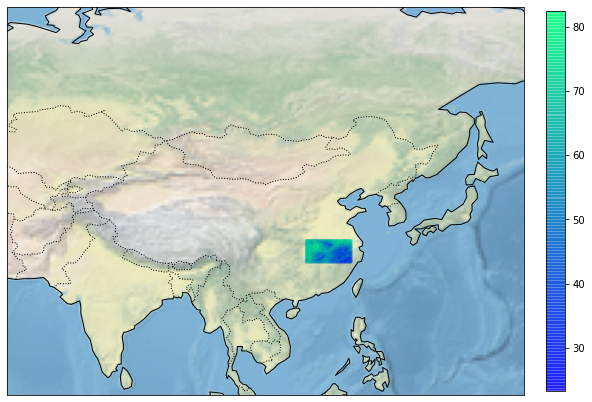

In [17]:
# <<-------------------- INSERT CODE HERE ----------------------->>
# I'm going to create a subset of our original dataframe rather than pull out new arrays for our coordinates and data. Thus..

new_dataframe =data[(data['lon'] > 112 ) & (data['lon'] < 120) & (data['lat'] > 28 ) & (data['lat'] < 32)]
Latitude_new = new_dataframe['lat'].values # Extract the 'Latitude' column and then its .values
Longitude_new = new_dataframe['lon'].values # Extract the 'Latitude' column and then its .values

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
lat1, lon1, lat2, lon2 = 60, 150, 5, 66, 
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.Geodetic())

cp=plt.scatter(Longitude_new, Latitude_new,
         c=new_dataframe['2004'].values, cmap='winter', linewidth=2, s=0.05, marker='o',alpha=0.65,
         transform=ccrs.PlateCarree(),
         )

plt.colorbar(cp,fraction=0.034, pad=0.04)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
fig.set_size_inches(10, 10)

plt.show()
# <<------------------------------------------------------------->>

<div class="alert alert-block alert-success">
<b> Exercise 4: Plot a percentage change in concentrations between 2005-2016 over China <a name="Exercise4"> </b> 
   
Whilst we can extract column values from a dataframe as numpy arrays, we can also create new columns. Imagine I had an existing dataframe called <code> daves_df </code> and I wanted to add a new column <code> diff </code> that contained absolute differences between two existing columns <code> A </code> and <code> B </code>. A typical set of operations to make this happen might include the following:
    
```python
array1 = daves_df['A'].values
array2 = daves_df['B'].values
difference_array = array1-array2
daves_df['diff'] = difference_array
```

where, in the final line, we create our new column and assign an array of values to that column. In the following code box, can you do the same but create a new column that includes values on the percentage change between 2005 and 2016? Once you have a new column, then proceed to visualise it on a map as per the previous examples given above. You should arrive at something similar to the following figure:
   
![](images/percen_change_map.png)
    
Please note, to use the same colourmap as this figure you will need to change the cmap command in the <code> plt.scatter() </code> call to <code> cmap='hsv' </code>.
    
<div>
    

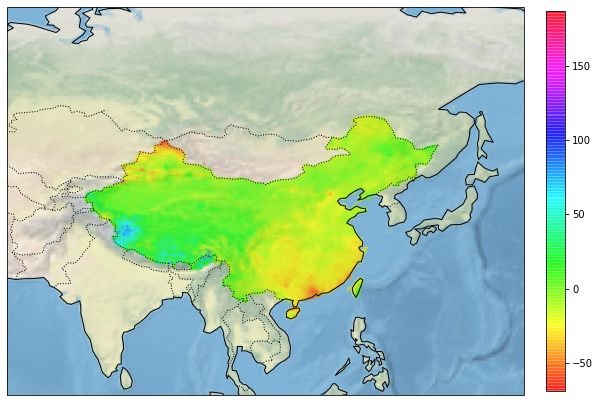

In [18]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# <<-------------------- INSERT CODE HERE ----------------------->>
#create a new column of % differences

array1 = data['2005'].values
array2 = data['2016'].values
difference_array = ((array2-array1)/(array1))*100.0
data['diff']=difference_array

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
lat1, lon1, lat2, lon2 = 60, 150, 5, 66, 
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.Geodetic())

cp=plt.scatter(Longitude, Latitude,
         c=data['diff'].values, cmap='hsv', linewidth=2, s=0.01, marker='o',alpha=0.65,
         transform=ccrs.PlateCarree(),
         )

plt.colorbar(cp,fraction=0.034, pad=0.04)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
fig.set_size_inches(10, 10)

plt.show()
# <<------------------------------------------------------------->>